<a href="https://colab.research.google.com/github/kodeu/trading-lstm/blob/model_setup/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files

dataext = []
data = []
for x in range(5):
  uploaded = files.upload()
  for filename in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))
  filename = list(uploaded.keys())[0]  # Adjust as per actual file name if needed

  # Load the JSON data from the file
  with open(filename, 'r') as file:
      rawdata = json.load(file)

  rawdata = np.array(rawdata)
  rawdata = rawdata.astype(np.float64)

  #divide ohlc prices by volume
  #rawdata = [[element / subarray[5] for element in subarray] if subarray[5] != 0 else 'Divisor is zero' for subarray in rawdata]
  rawdata = [[element / 100000 for element in subarray] for subarray in rawdata]

  #only keep ohlc values
  rawdata = [sub_array[1:5] for sub_array in rawdata]

  data.extend(np.array(rawdata))

data = np.array(data)
window_size = 50  # Maximum window size

# Prepare sequences
X = []
y = []

for i in range(len(data) - window_size):
    #start_index = max(0, i - window_size + 1)
    sequence = data[i:i+window_size]
    X.append(sequence)
    y.append(data[i+window_size-1])  # Adjust according to how your targets are defined

# Pad sequences so that they are all the same length
X_padded = np.array(X) #pad_sequences(X, maxlen=window_size, padding='post', dtype='float32')
y_padded = np.array(y)  # Assuming y needs no padding
X_padded = X_padded.astype('float32')
y_padded = y_padded.astype('float32')

# Check shapes
print("Padded X shape:", X_padded.shape)
print("Padded y shape:", y_padded.shape)
print(y_padded)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Assuming y_padded is to predict the next timestep feature, adjust the output layer accordingly
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, data.shape[1])),
    Dense(data.shape[1])  # Predicting the same number of features as input
])

model.compile(optimizer='adam', loss='mse')
model.summary()


history = model.fit(X_padded, y_padded, epochs=20, batch_size=32, validation_split=0.2)



Saving btcusdt_21Jul2018_1d_250int.json to btcusdt_21Jul2018_1d_250int (9).json
User uploaded file "btcusdt_21Jul2018_1d_250int (9).json" with length 45496 bytes


Saving btcusdt_13Nov2018_1d_250int.json to btcusdt_13Nov2018_1d_250int (9).json
User uploaded file "btcusdt_13Nov2018_1d_250int (9).json" with length 45181 bytes


Saving btcusdt_27Mar2020_1d_250int.json to btcusdt_27Mar2020_1d_250int (9).json
User uploaded file "btcusdt_27Mar2020_1d_250int (9).json" with length 45917 bytes


Saving btcusdt_02Dec2020_1d_250int.json to btcusdt_02Dec2020_1d_250int (9).json
User uploaded file "btcusdt_02Dec2020_1d_250int (9).json" with length 46995 bytes


Saving btcusdt_09Aug2021_1d_250int.json to btcusdt_09Aug2021_1d_250int (9).json
User uploaded file "btcusdt_09Aug2021_1d_250int (9).json" with length 46799 bytes
Padded X shape: (1200, 50, 4)
Padded y shape: (1200, 4)
[[0.1038124 0.1048    0.100685  0.1030312]
 [0.1030258 0.1038499 0.09953   0.1009815]
 [0.1009819 0.10293   0.0988    0.1015833]
 ...
 [0.4007495 0.4156131 0.3958854 0.4114779]
 [0.4114778 0.415     0.3955194 0.3994238]
 [0.3994237 0.4087036 0.397664  0.405519 ]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                11000     
                                                                 
 dense_6 (Dense)             (None, 4)                 204       
                                                                 
Total params: 11204 (43.77 KB)
Trainable params: 11204 (43.77 KB)
Non-trainable params: 0 (0.00 Byte

Saving btcusdt_16Apr2022_1d_250int.json to btcusdt_16Apr2022_1d_250int (18).json
User uploaded file "btcusdt_16Apr2022_1d_250int (18).json" with length 47212 bytes


Saving btcusdt_22Dec2022_1d_250int.json to btcusdt_22Dec2022_1d_250int (18).json
User uploaded file "btcusdt_22Dec2022_1d_250int (18).json" with length 46848 bytes
Padded X shape: (450, 50, 4)
Padded y shape: (450, 4)
15/15 [==============================] - 0s 8ms/step - loss: 1.6563e-04
Test Loss: 0.00016563208191655576
15/15 [==============================] - 0s 9ms/step


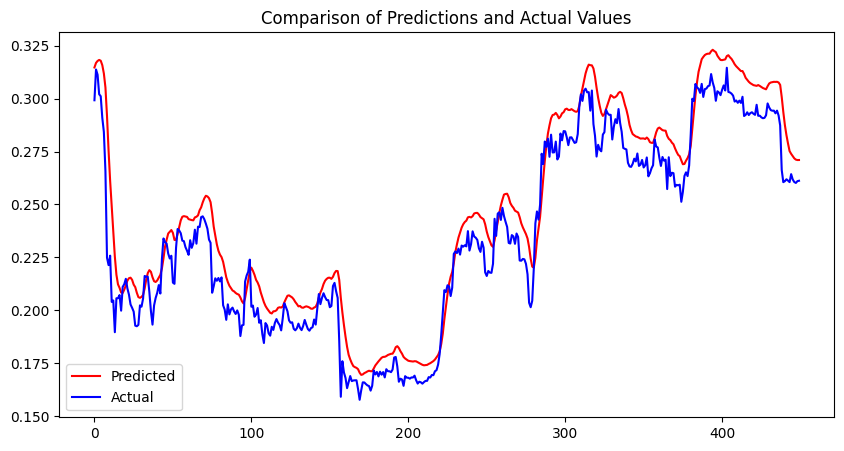

Mean Absolute Error on Test Set: 0.010551808401942253


In [36]:
raw_test_data = []
test_data = []
for x in range(2):
  uploaded = files.upload()
  for filename in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))
  filename = list(uploaded.keys())[0]  # Adjust as per actual file name if needed

  # Load the JSON data from the file
  with open(filename, 'r') as file:
      raw_test_data = json.load(file)

  raw_test_data = np.array(raw_test_data)
  raw_test_data = raw_test_data.astype(np.float64)

  #divide ohlc prices by volume
  #raw_test_data = [[element / subarray[5] for element in subarray] if subarray[5] != 0 else 'Divisor is zero' for subarray in raw_test_data]
  raw_test_data = [[element / 100000 for element in subarray] for subarray in raw_test_data]

  #only keep ohlc values
  raw_test_data = [sub_array[1:5] for sub_array in raw_test_data]

  test_data.extend(np.array(raw_test_data))

test_data = np.array(test_data)
window_size = 50  # Maximum window size

# Prepare sequences
test_X = []
test_y = []

for i in range(len(test_data) - window_size):
    sequence = test_data[i:i+window_size]
    test_X.append(sequence)
    test_y.append(test_data[i+window_size-1])  # Adjust according to how your targets are defined

# Pad sequences so that they are all the same length
test_X_padded = np.array(test_X) #pad_sequences(test_X, maxlen=window_size, padding='post', dtype='float32')
test_y_padded = np.array(test_y)  # Assuming y needs no padding
test_X_padded = test_X_padded.astype('float32')
test_y_padded = test_y_padded.astype('float32')

# Check shapes
print("Padded X shape:", test_X_padded.shape)
print("Padded y shape:", test_y_padded.shape)

test_loss = model.evaluate(test_X_padded, test_y_padded)
print(f"Test Loss: {test_loss}")


predictions = model.predict(test_X_padded)

# Compare predictions with actual outcomes (example)
import matplotlib.pyplot as plt

# Plotting first 10 predictions and actual values for comparison
predictions_close_prices = [subarray[3] for subarray in predictions]
test_y_padded_close_prices = [subarray[3] for subarray in test_y_padded]
plt.figure(figsize=(10, 5))
plt.plot(predictions_close_prices, 'r-', label='Predicted')
plt.plot(test_y_padded_close_prices, 'b-', label='Actual')
plt.title('Comparison of Predictions and Actual Values')
plt.legend()
plt.show()


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y_padded.flatten(), predictions.flatten())
print(f"Mean Absolute Error on Test Set: {mae}")

